# Gravitational Wave data and their processing

*author: Elena Cuoco*

## Which kind of data are Gravitational Wave detector data?

The output of a gravitational wave detector is typically represented as a strain time series. Strain refers to the fractional change in length of the detector's arms caused by the passing gravitational wave. The strain time series provides a detailed record of the amplitude, frequency, and duration of the detected gravitational wave signal. 
Analyzing the time series data obtained from gravitational wave detectors involves several steps. First, the raw data must be processed and filtered to remove noise, instrumental artifacts, and environmental disturbances. Various algorithms and techniques are employed to enhance the signal-to-noise ratio and extract the gravitational wave signal from the data. 
The time series data also provides valuable information about the properties of the source that generated the gravitational wave. By comparing the observed signal with theoretical models, scientists can infer the masses, spins, and orbital parameters of the binary system that produced the waves. This information helps deepen our understanding of astrophysical processes, such as the formation and evolution of black holes and neutron stars.Moreover, the continuous monitoring of gravitational wave data over time allows scientists to search for transient events and study their statistical properties. By analyzing the distribution of events and their occurrence rates, researchers can gain insights into the astrophysical populations that produce gravitational waves.

We will examine in the followinf steps how to read, plot, preprocess, transform and prepare a GW data set for Machine Learning application.

### Reference for the material used in this notebook:
    - https://github.com/jkanner/gw-intro
    - https://gwosc.org/

In [1]:
import requests, os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy"
    ! pip install -q "matplotlib"
    from gwpy.timeseries import TimeSeries    

In [2]:
# -- Set a GPS time:
t0 = 1256665188     
#-- Choose detector as H1, L1, or V1
detector = 'L1'


In [3]:

#data path file
local_dir=os.getcwd()
pp=os.path.abspath('../../')
filename ='L-L1_GWOSC_O3b_16KHZ_R1-1256665088-4096.hdf5'
fn=os.path.join(pp, 'gwosc',filename)

print(fn)

/home/elenacuoco/Lectures/gwosc/L-L1_GWOSC_O3b_16KHZ_R1-1256665088-4096.hdf5


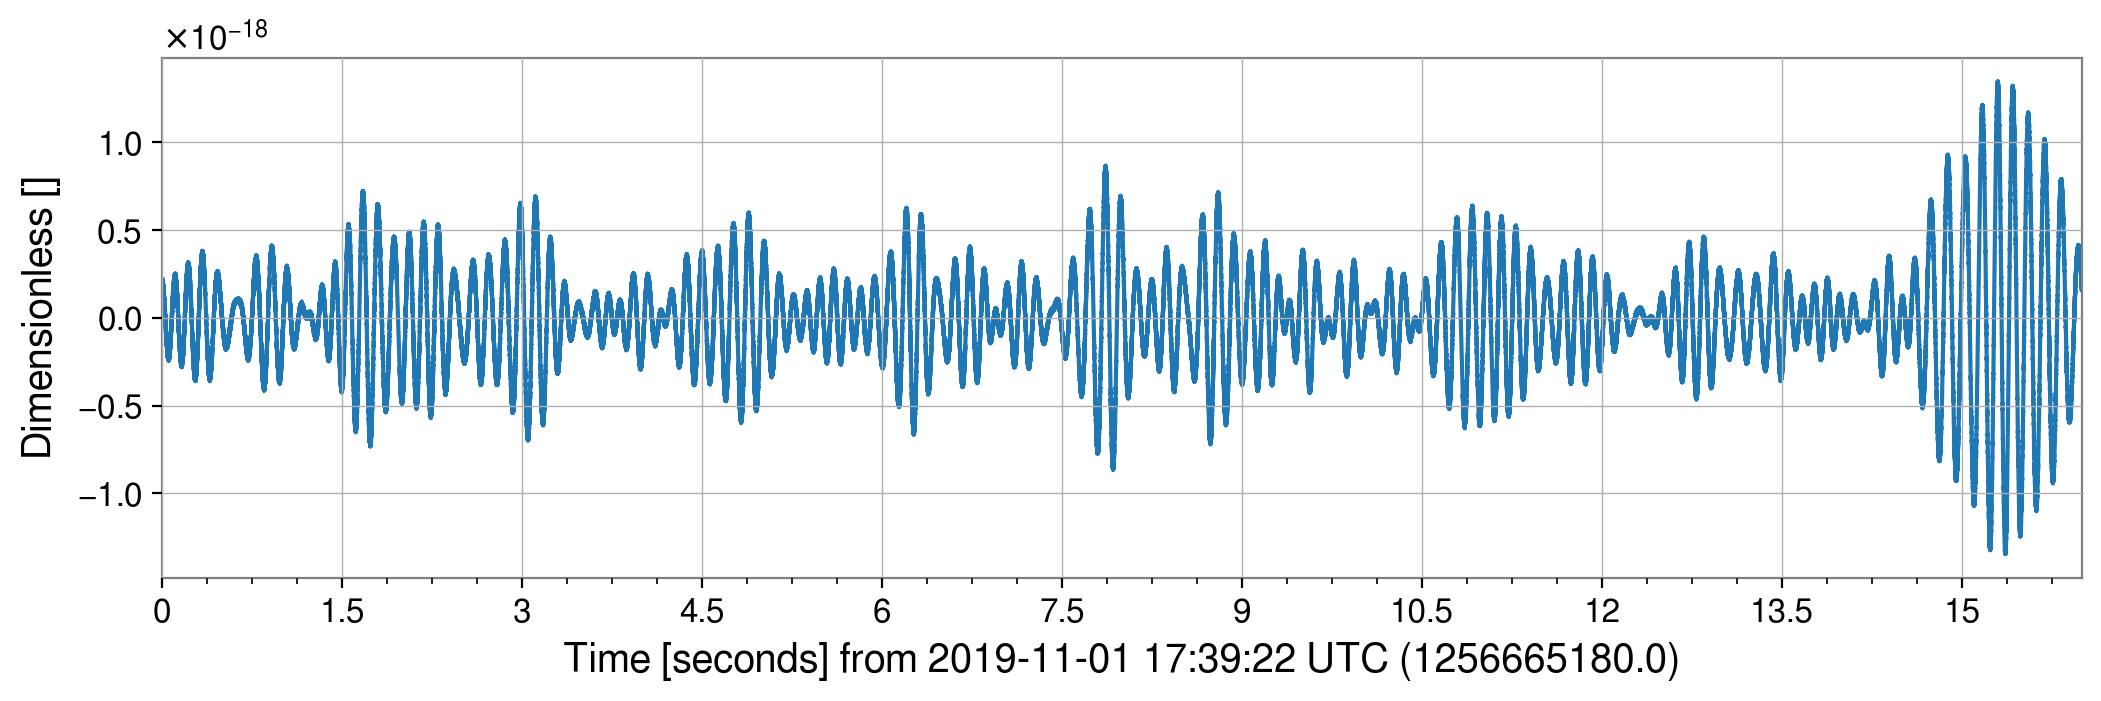

In [4]:
#plotting strain data

# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-8, center+8)
fig1 = strain.plot()



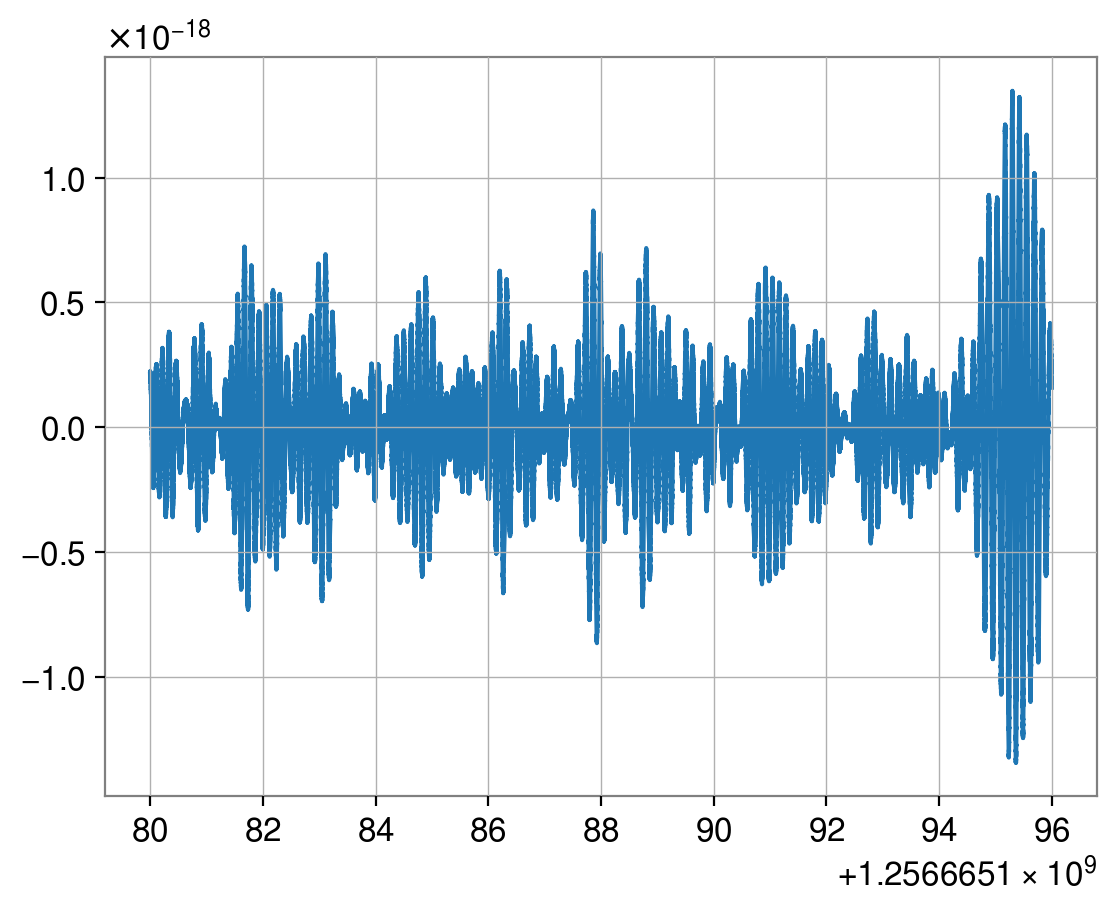

In [5]:
plt.plot(strain)

In [6]:
white = strain.whiten(4, 2)

/data01/shared/TestEnvPy3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


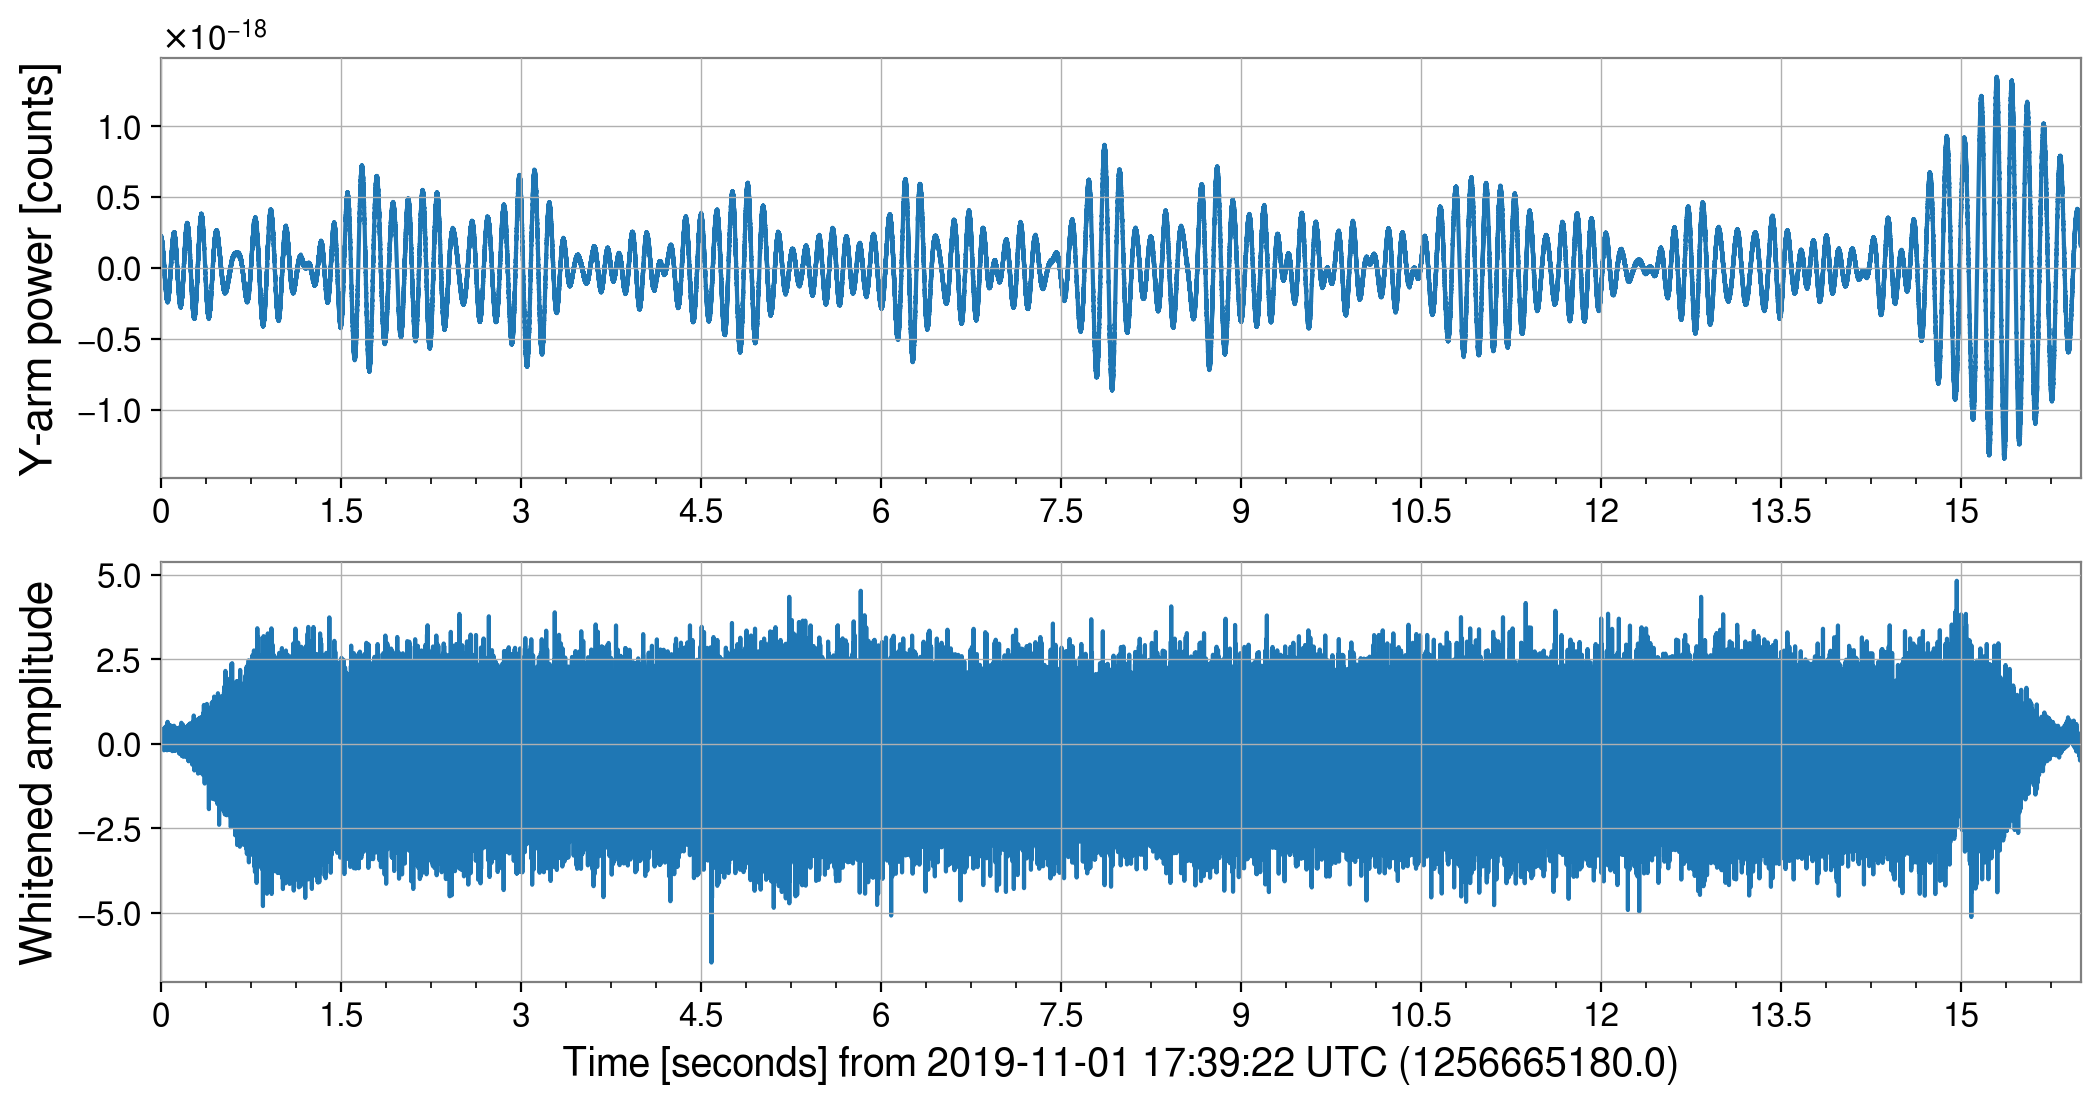

In [7]:
from gwpy.plot import Plot
plot = Plot(strain, white, separate=True, sharex=True)
plot.axes[0].set_ylabel('Y-arm power [counts]', fontsize=16)
plot.axes[1].set_ylabel('Whitened amplitude', fontsize=16)
plot.show()


In [8]:
try:
    import statsmodels.api as sm
except:
    ! pip install -q "statsmodels"
  

In [9]:
import statsmodels.api as sm
import numpy as np
def whiten(data,N,rhoin):
     ##add whitening process
  
   
    X = range(0,N)
    X = sm.add_constant(X)
    ARwhiten = sm.GLSAR(data[:N], X, rho=rhoin)
    for i in range(12):
        results = ARwhiten.fit()
        rho, sigma = sm.regression.linear_model.burg(results.resid,
                                        order=ARwhiten.order)
        ARwhiten  = sm.GLSAR(data[:N], X, rho)
    
    dataw=np.zeros(len(data))
    dataw=ARwhiten.whiten(data)
   
    del X, ARwhiten, results
    
    return dataw

In [10]:
fs=16384
yw=whiten(strain,int(8*fs),16)
x=strain.dx

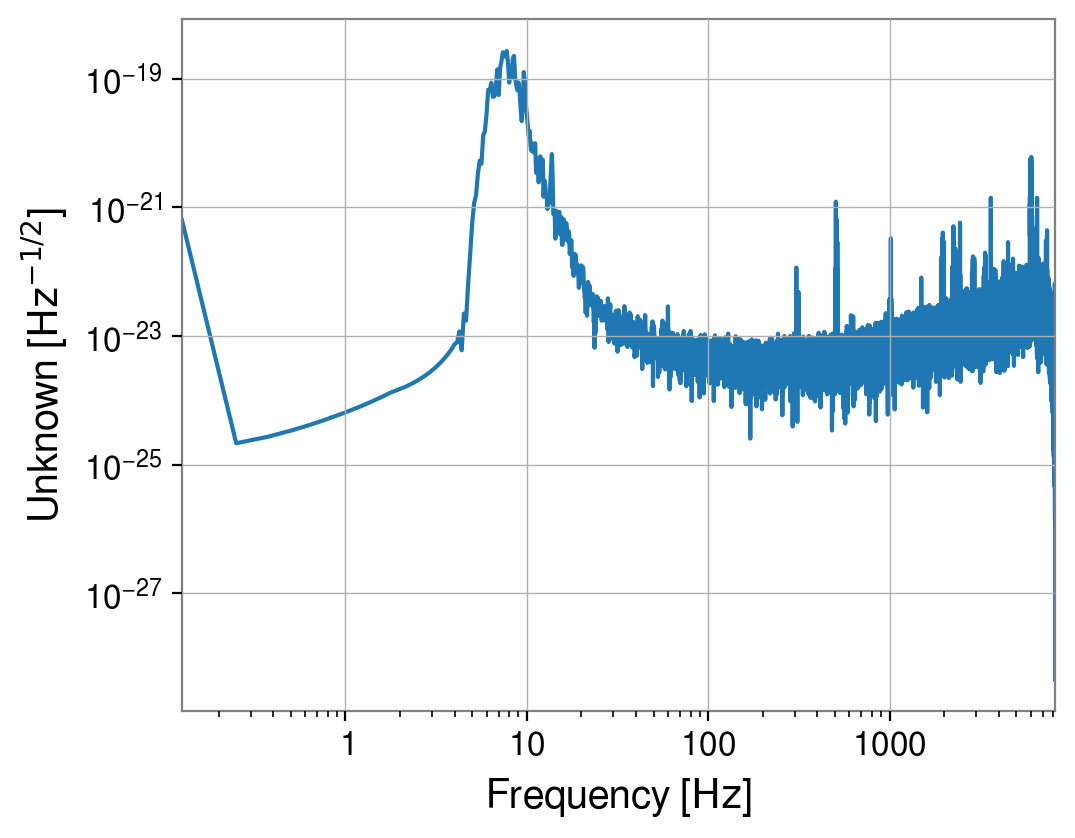

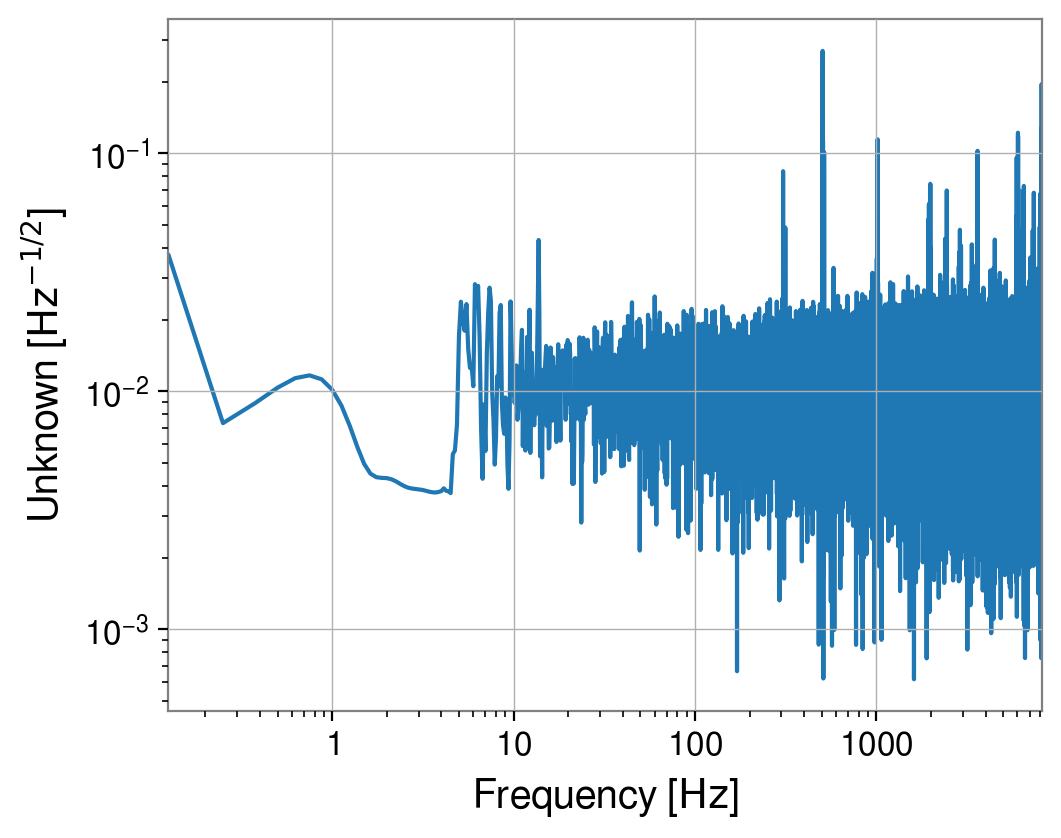

In [37]:
# -- Plot ASD
fig1=strain.asd(fftlength=8).plot()
fig2=white.asd(fftlength=8).plot()
#plt.xlim(10,2000)
#plt.ylim(1e-24, 1e-19)

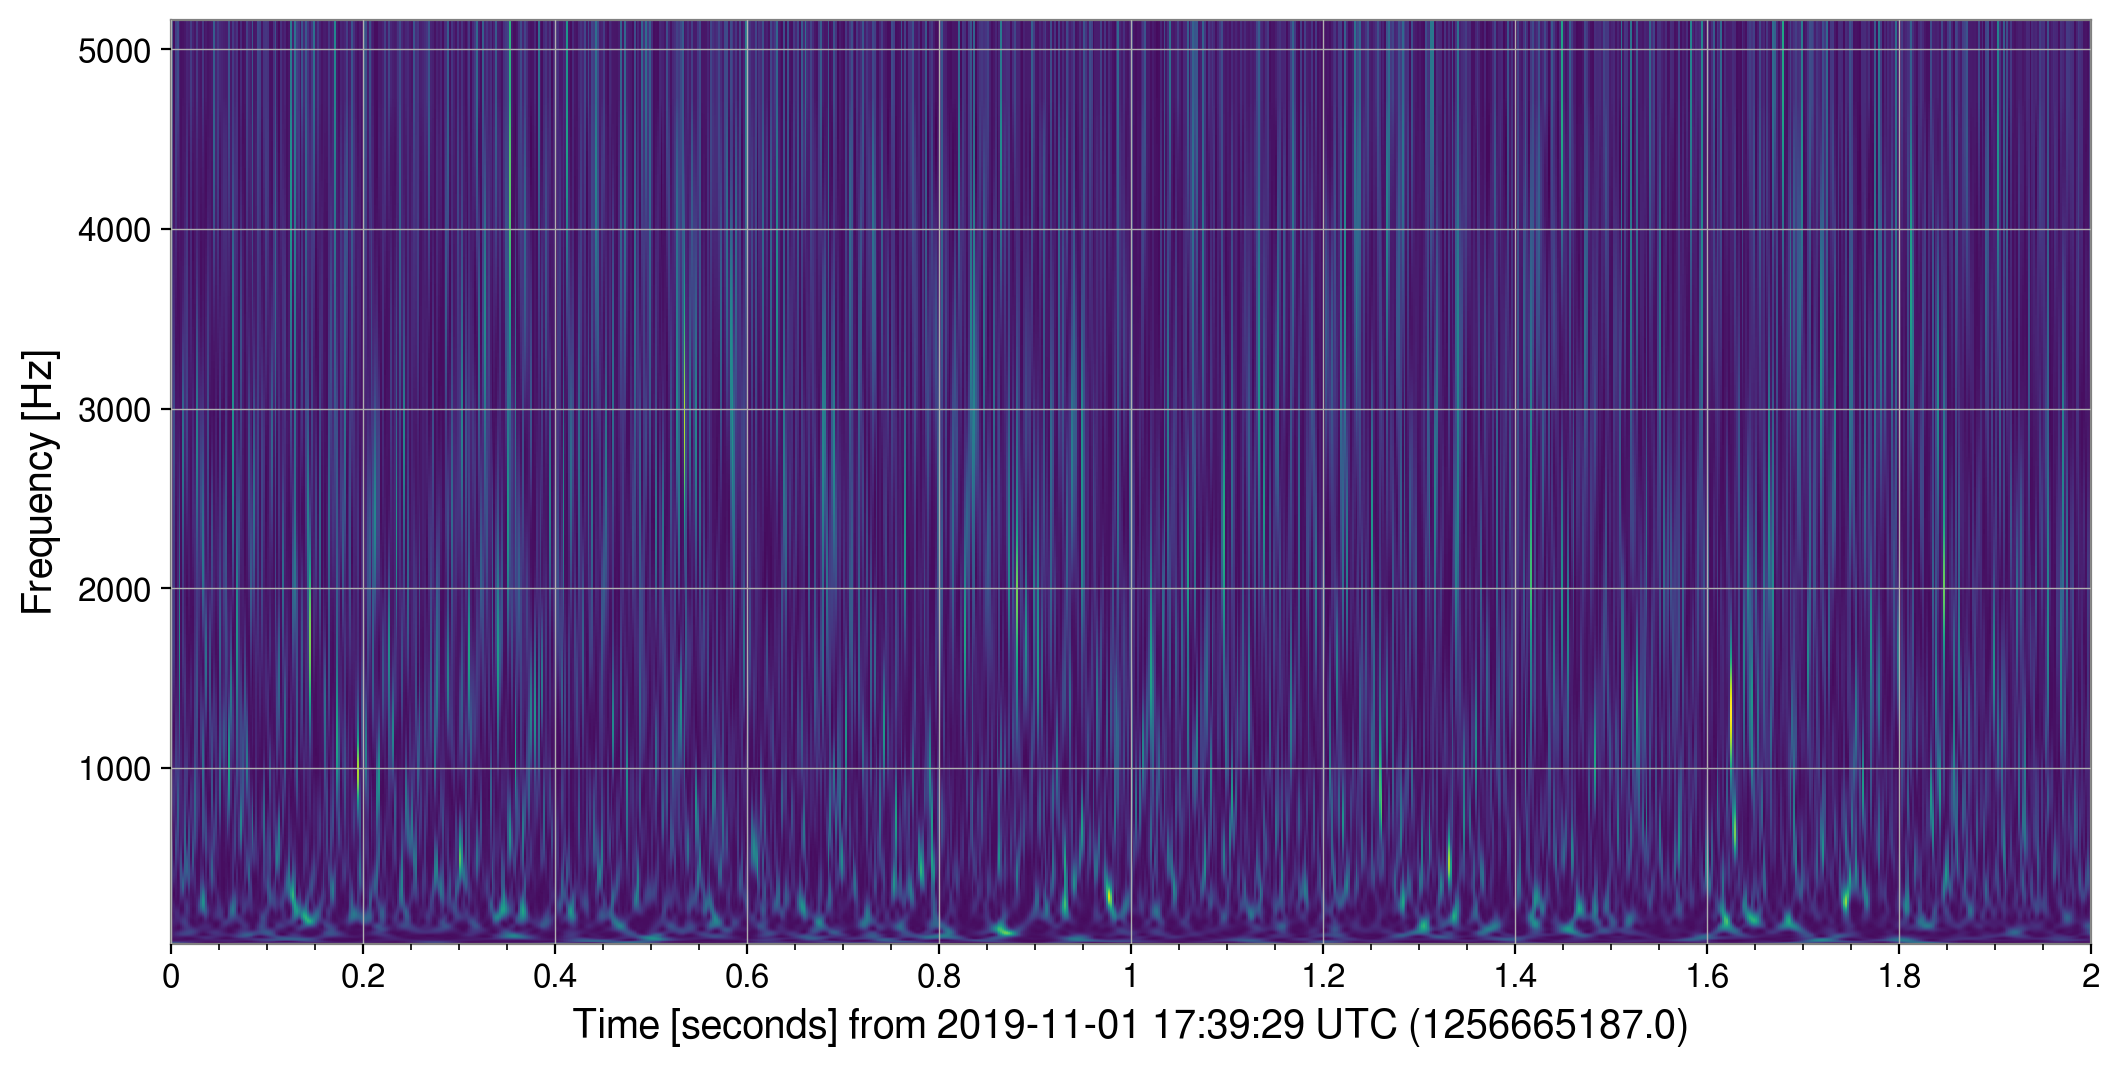

In [46]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
#plt = fig4.gca()
#fig4.colorbar(label="Normalized energy")
#plt.grid(False)
#plt.set_yscale('log')


In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from scipy import signal
from matplotlib.colors import LogNorm

def prepareImage_gw(x,y,fs,title="Time-Frequency map"):
    w = 6.
    freq = np.linspace(1, fs/2, int(fs/2))
    widths = w*fs / (2*freq*np.pi)
    z = np.abs(signal.cwt(y, signal.morlet2, widths, w=w))**2

    plt.pcolormesh(x, freq,z,cmap='coolwarm',shading='gouraud',alpha=0.95)
    plt.yscale('log')
    plt.ylim(4, 8192)
    plt.title=title
    plt.show() 
   
    return 

In [12]:
#prepareImage_gw(x,yw,fs=16384)

(4, 8192)

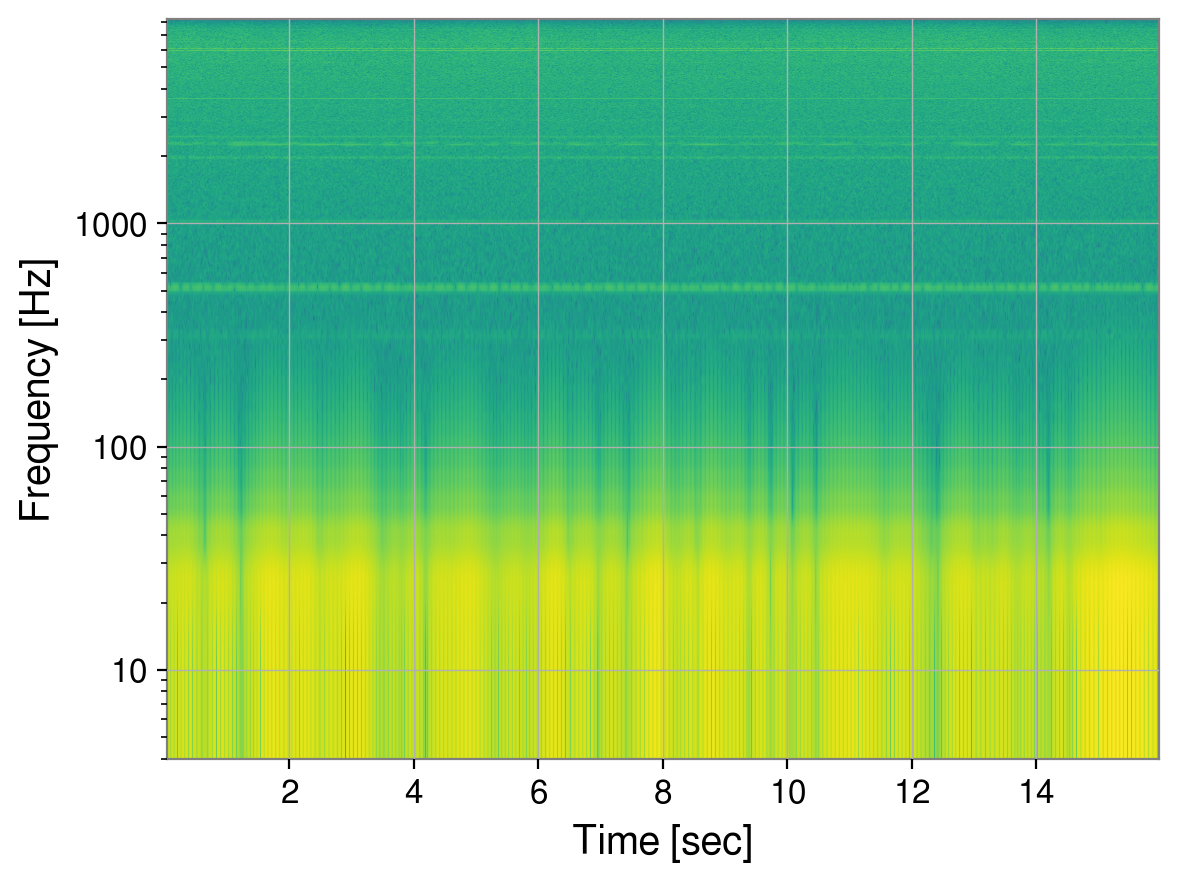

In [25]:
fs = 16384
NFFT=1024
plt.figure()
Pxx, freqs, bins, im = plt.specgram(strain, NFFT=NFFT, Fs=fs, noverlap=1000)
plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')
 
plt.yscale('log')
plt.ylim(4, 8192)
 

(4, 8192)

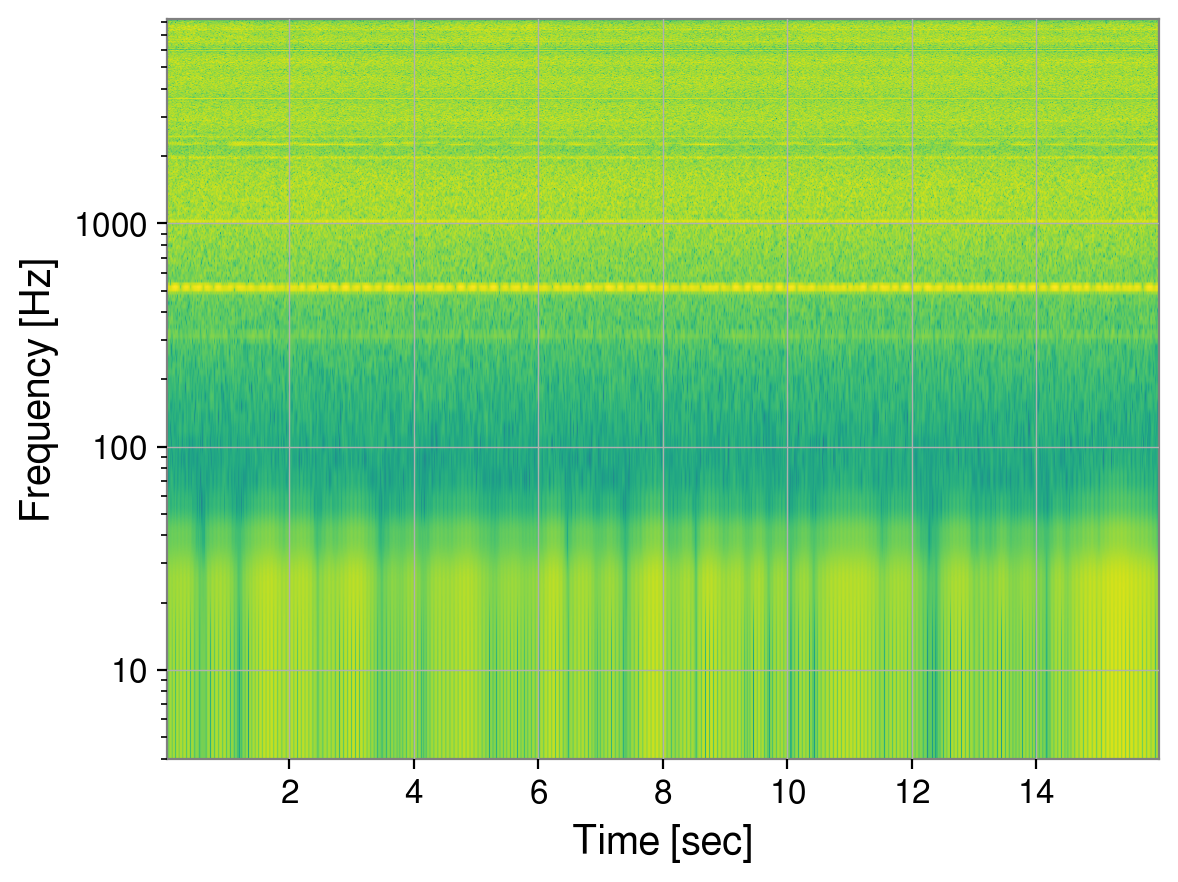

In [26]:
fs = 16384
NFFT=1024
plt.figure()
Pxx, freqs, bins, im = plt.specgram(yw, NFFT=NFFT, Fs=fs, noverlap=1000)
plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')
 
plt.yscale('log')
plt.ylim(4, 8192)

(4, 8192)

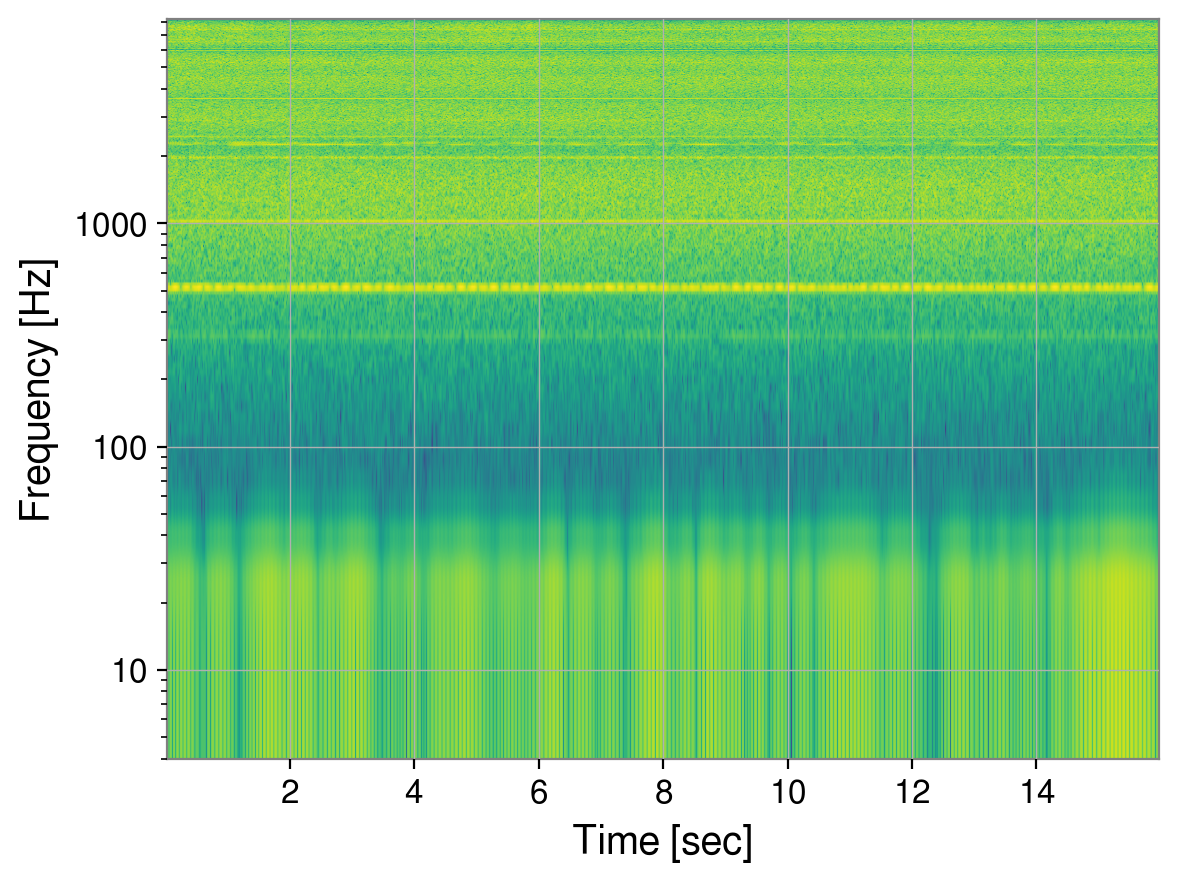

In [27]:
fs = 16384
NFFT=1024
plt.figure()
Pxx, freqs, bins, im = plt.specgram(yw, NFFT=NFFT, Fs=fs, noverlap=900)
plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')
 
plt.yscale('log')
plt.ylim(4, 8192) 

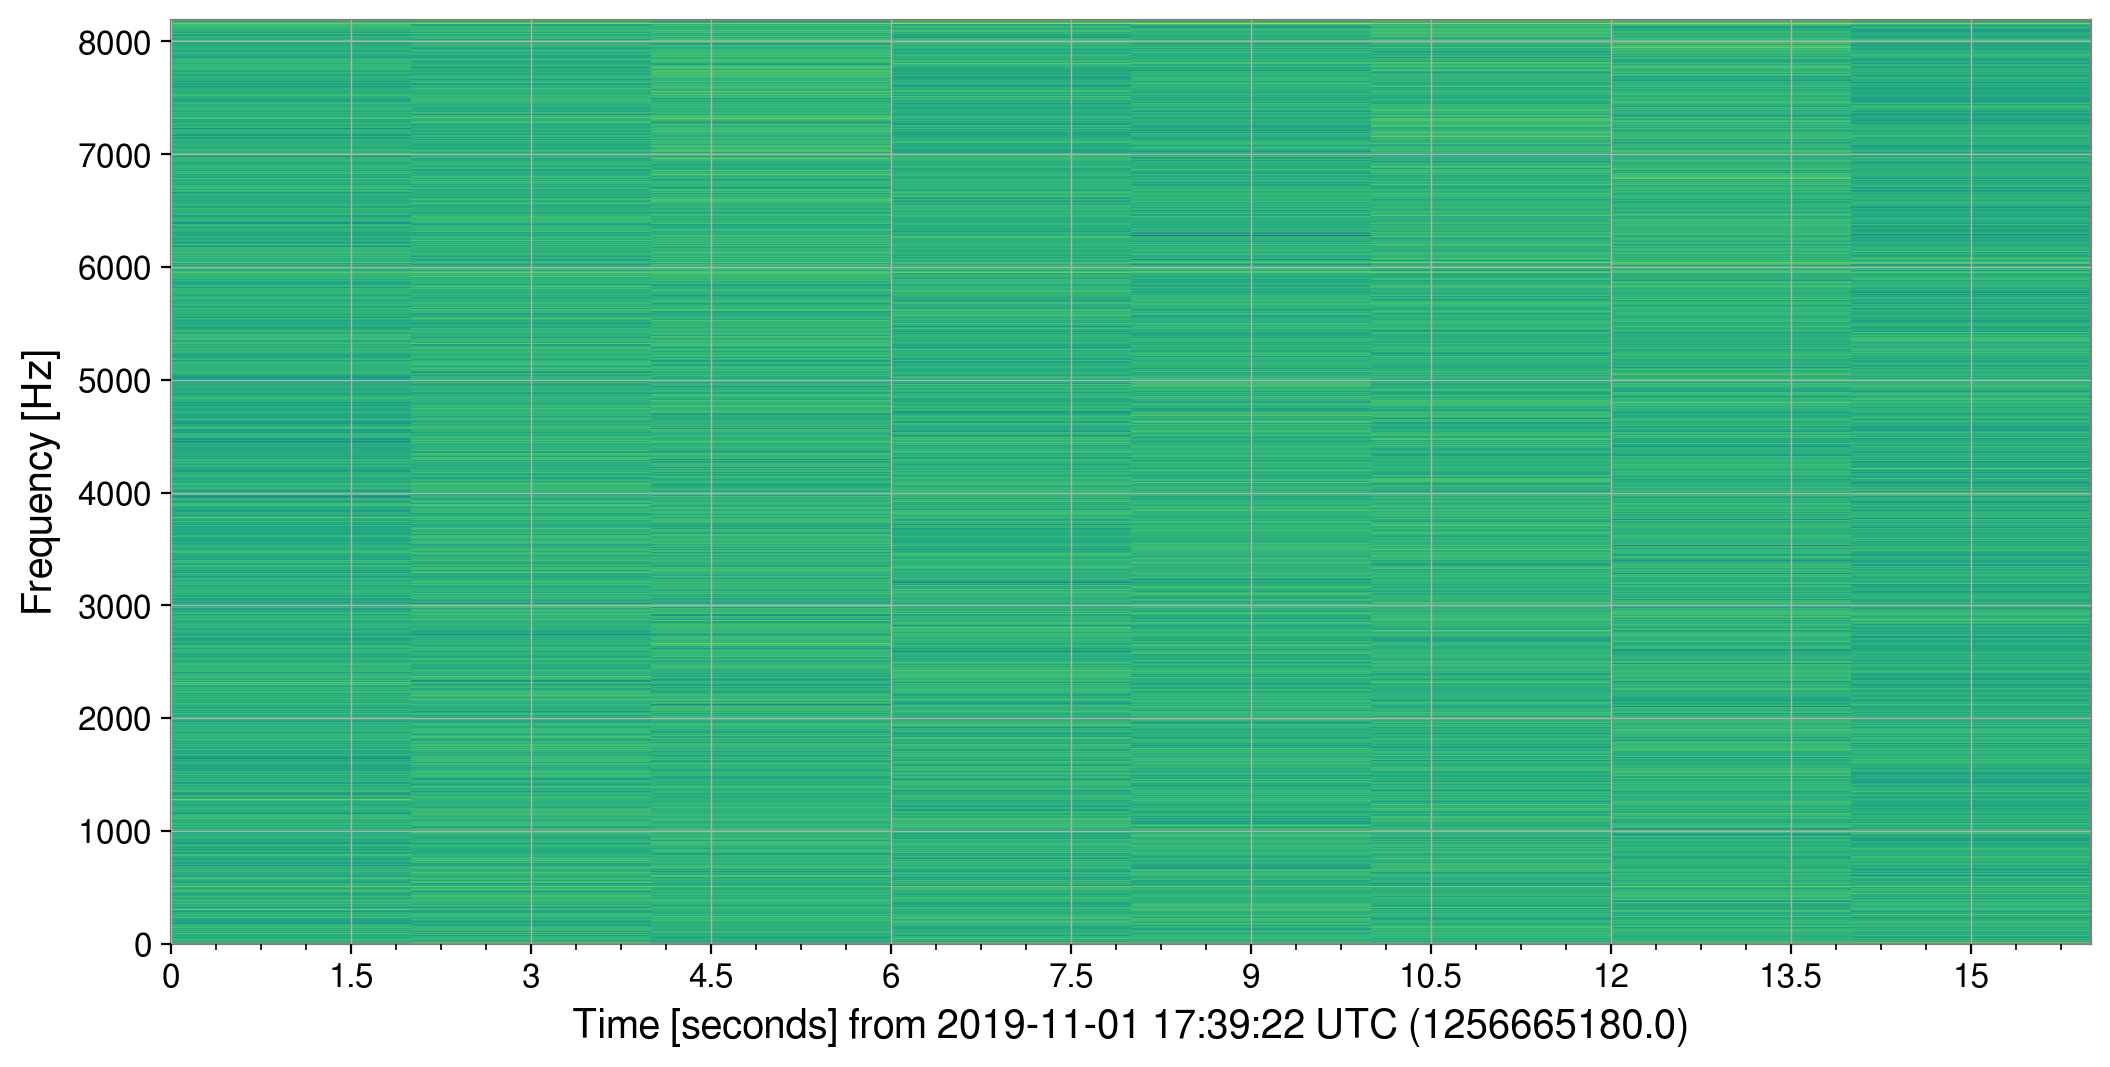